# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * reset - True / False boolean to reset starting w values, relevant in gradient descent OlsCd and OlsGd. Usually its reseted to 0's
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from numpy.linalg import pinv

C:\Users\jjlev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)

In [3]:
print('p is:',X.shape[1],'\n n is:',X.shape[0])

p is: 13 
 n is: 506


In [4]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
    def __init__(self):
        self.w = None
    
    @staticmethod
    def pad(X):
        return np.hstack([np.ones((len(X),1)),X])
    def fit(self, X, Y): 
    #remeber pad with 1 before fitting
        x=Ols.pad(X)
        self.w = np.dot(np.dot(pinv(np.dot(x.T,x)),x.T),Y)
    def predict(self, X):
        return np.dot(Ols.pad(X),self.w)
    def score(self, X, Y):
        return ((self.predict(X) - Y)**2).mean() 

In [5]:
OLS =Ols()
OLS.fit(X,y)
OLS.predict(X)
OLS.score(X,y)

21.894831181729202

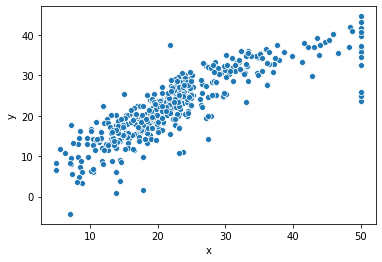

In [6]:
df = pd.DataFrame({'x':y, 'y':OLS.predict(X)})
sns.scatterplot(data=df, x='x', y='y')

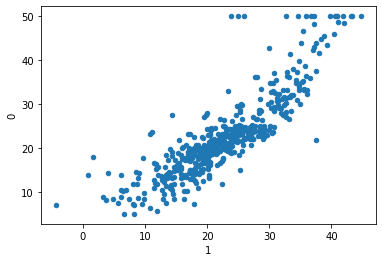

In [7]:
df=pd.DataFrame([y,OLS.predict(X)]).T
df.plot.scatter(1,0)

In [8]:
# test 
sum_MSE_train = 0  #variable to store the summation of differences
sum_MSE_test = 0  #variable to store the summation of differences
list_MSE_train = []  #variable to store the summation of differences
list_MSE_test = []  #variable to store the summation of differences
n = 20 #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    ols = Ols()
    ols.fit(X_train,y_train)
    MSE_train = ols.score(X_train,y_train)  #taking square of the differene 
    # print ("The Mean Square Error for train is: " + str(MSE_train))
    MSE_test = ols.score(X_test,y_test)
    # print ("The Mean Square Error for test is: " + str(MSE_test))
    list_MSE_train.append(MSE_train)
    list_MSE_test.append(MSE_test)
    sum_MSE_train = sum_MSE_train + MSE_train  #taking a sum of all the differences
    sum_MSE_test = sum_MSE_test + MSE_test  #taking a sum of all the differences
mean_MSE_train = sum_MSE_train/n  #dividing summation by total values to obtain average
mean_MSE_test = sum_MSE_test/n  #dividing summation by total values to obtain average
print ("The average Mean Square Error for train is: " + str(mean_MSE_train))
print ("The average Mean Square Error for test is: " + str(mean_MSE_test))

The average Mean Square Error for train is: 21.976987998727953
The average Mean Square Error for test is: 22.929946140557117


In [9]:
stats.ttest_rel(np.array(list_MSE_train), np.array(list_MSE_test))

Ttest_relResult(statistic=-0.5796255012657198, pvalue=0.5689771053893049)

The train MSE is smaller, but the t_test result is not significant.

In [10]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
    def __init__(self):
        pass

    def fit(self, X):
        self.mean=np.mean(X,axis=0)
        self.std=np.std(X,axis=0)

    def predict(self, X):
    #apply normalization
        return (X-self.mean)/self.std
    
class OlsGd(Ols):
  
    def __init__(self, learning_rate=.05, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               verbose=True):
    
        super(OlsGd, self).__init__()
        self.learning_rate = learning_rate
        self.num_iteration = num_iteration
        self.early_stop = early_stop
        self.normalize = normalize
        self.normalizer = Normalizer()    
        self.verbose = verbose
        
        
    def _fit(self, X, Y, reset=True, track_loss=True):
        #remeber to normalize the data before starting
        if self.normalize:
            self.normalizer.fit(X)
            X_norm = Ols.pad(self.normalizer.predict(X))
        else:
            X_norm=X
        self.w=np.zeros(X_norm.shape[1])
        self.mse=float('inf')
        self.mse_iters=[]
        i,self.delta=0,1e10
        while i<self.num_iteration:
            self._step(X_norm,Y)
            i+=1
            score=self._score(X_norm,Y)
            if self.verbose:
                print("Iteration:",i,"MSE",score)
            if score<self.mse:
                self.mse=score
                self.mse_iters.append(score)
            else:
                break
            if self.early_stop:
                if np.square(self.delta).sum()<.0001:
#                     print(i)
                    break

    def predict(self, X):
    #remeber to normalize the data before starting
        X_norm = Ols.pad(self.normalizer.predict(X))
        return np.dot(X_norm,self.w)
    
    def score(self, X, Y):
        return ((self.predict(X) - Y)**2).mean() 
    
    def _predict(self, X):
    #remeber to normalize the data before starting
        return np.dot(X,self.w)
    
    def _score(self, X, Y):
        return ((self._predict(X) - Y)**2).mean()
    
    def _step(self, X, Y):
            self.delta=self.learning_rate*(1/X.shape[0])*np.dot(X.T,np.dot(X,self.w)-Y)
            self.w=self.w-self.delta


In [11]:
olsgd=OlsGd()
olsgd._fit(X,y)

Iteration: 1 MSE 522.9657211730249
Iteration: 2 MSE 467.50502719173977
Iteration: 3 MSE 420.8340700697398
Iteration: 4 MSE 380.3632823145153
Iteration: 5 MSE 344.6512561040272
Iteration: 6 MSE 312.8285213030327
Iteration: 7 MSE 284.31833228630956
Iteration: 8 MSE 258.7005622380903
Iteration: 9 MSE 235.64463328504192
Iteration: 10 MSE 214.8758238543577
Iteration: 11 MSE 196.15777938814819
Iteration: 12 MSE 179.28294837081012
Iteration: 13 MSE 164.06694746356868
Iteration: 14 MSE 150.3449211485762
Iteration: 15 MSE 137.96895446367387
Iteration: 16 MSE 126.80607637433147
Iteration: 17 MSE 116.73662276195498
Iteration: 18 MSE 107.65284023601977
Iteration: 19 MSE 99.45766675861742
Iteration: 20 MSE 92.06365212878188
Iteration: 21 MSE 85.3919950213214
Iteration: 22 MSE 79.37168040432006
Iteration: 23 MSE 73.93870509467702
Iteration: 24 MSE 69.03538155733365
Iteration: 25 MSE 64.60971158904594
Iteration: 26 MSE 60.614822630814125
Iteration: 27 MSE 57.00846031114516
Iteration: 28 MSE 53.752531

0.050    22.284925
0.100    22.024331
0.150    21.958567
0.200    21.931805
0.250    21.918596
0.300    21.910963
0.310    21.910192
0.325    22.825330
dtype: float64


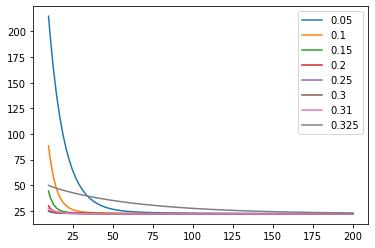

In [12]:
all_scores=dict()
for alpha in [.05,.1,.15,.2,.25,.3,.31,.325]:
    scores=dict()
    for niter in np.linspace(10,200,100):
        olsgd=OlsGd(num_iteration=int(niter),learning_rate=alpha,verbose=False)
        olsgd._fit(X,y)
        scores[int(niter)]=olsgd.score(X,y)
    all_scores[alpha]=scores

import pandas as pd
print(pd.DataFrame(all_scores).min())

pd.DataFrame(all_scores).plot()

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



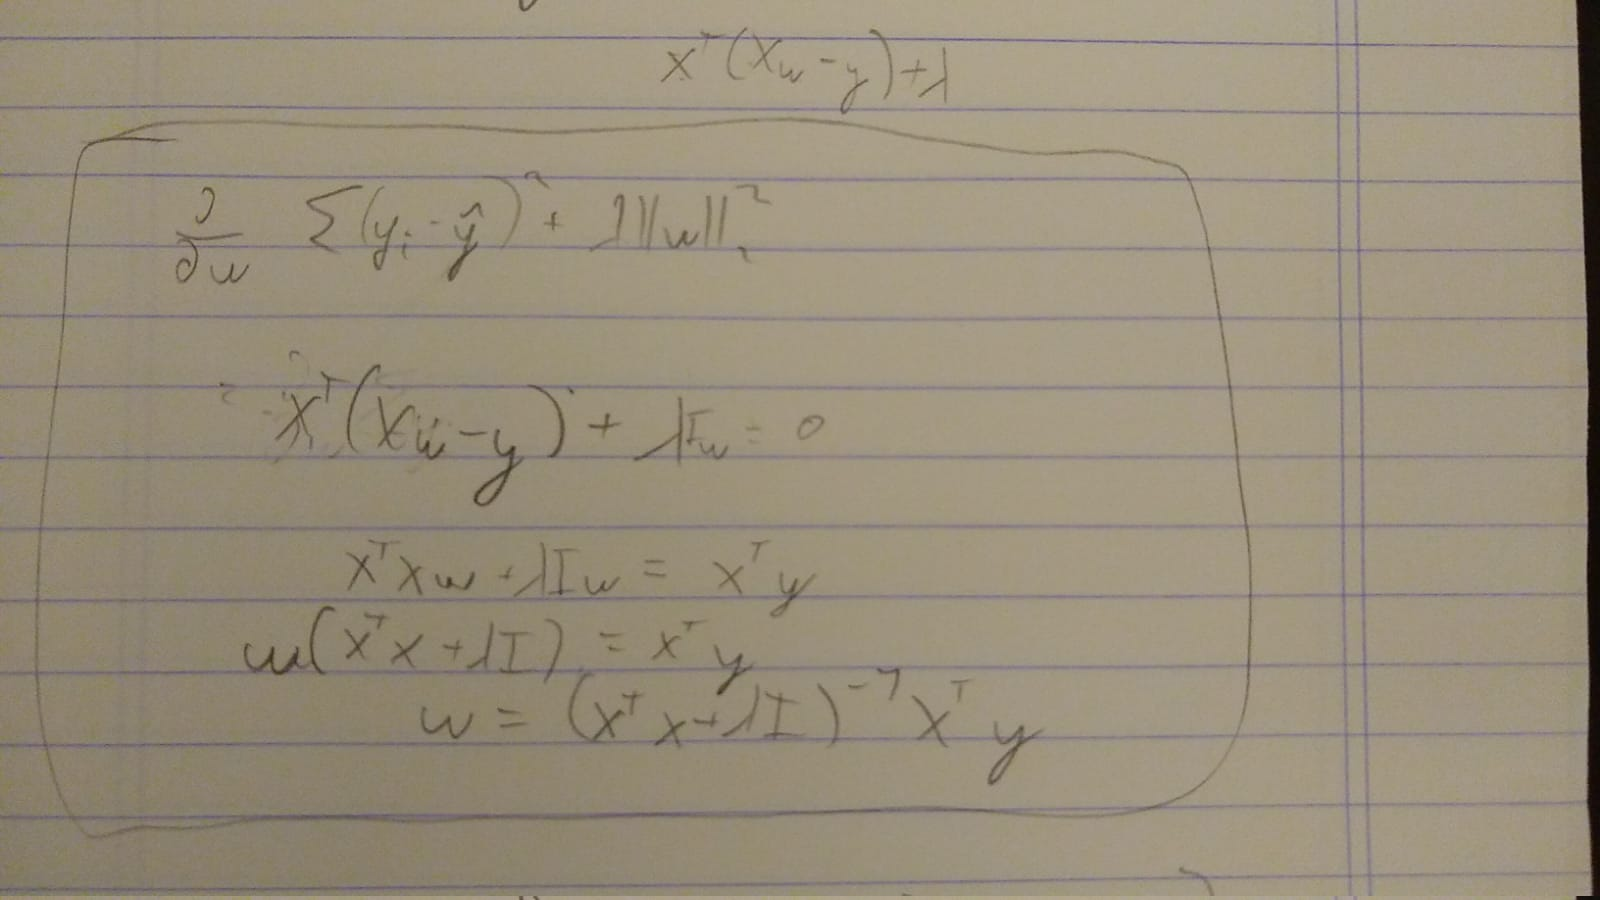

In [14]:
class RidgeLs(Ols):
    def __init__(self, ridge_lambda, *wargs, **kwargs):
        super(RidgeLs,self).__init__(*wargs, **kwargs)
        self.ridge_lambda = ridge_lambda
    
    def _fit(self, X, Y):
    #Closed form of ridge regression
        x=Ols.pad(X)
        self.w = np.dot(np.dot(pinv(np.dot(x.T,x)+self.ridge_lambda*np.eye(x.shape[1])),x.T),Y)


In [15]:
ridgels=RidgeLs(100)
ridgels._fit(X,y)

In [16]:
ridgels.score(X,y)

25.579403534203916

In [17]:
class RidgeLsgd(OlsGd):
    def __init__(self, ridge_lambda, *wargs, **kwargs):
        super(RidgeLsgd,self).__init__(*wargs, **kwargs)
        self.ridge_lambda = ridge_lambda
    
#   def _fit(self, X, Y):
#     #Closed form of ridge regression
#     x=Ols.pad(X)
#     self.w = np.dot(np.dot(pinv(np.dot(x.T,x)+self.ridge_lambda*np.eye(x.shape[1])),x.T),Y)
    def _fit(self, X, Y, reset=True, track_loss=True):
        #remeber to normalize the data before starting
        if self.normalize:
            self.normalizer.fit(X)
            X_norm = Ols.pad(self.normalizer.predict(X))
        else:
            X_norm=X
        self.w=np.zeros(X_norm.shape[1])
        i,delta=0,1e10
        while i<self.num_iteration:
            
            delta=self.learning_rate*(1/X_norm.shape[0])*np.dot(X_norm.T,np.dot(X_norm,self.w)-Y) + self.ridge_lambda*np.ones(X_norm.shape[1])
            self.w=self.w-delta
            i+=1
            if self.early_stop:
                if np.square(delta).sum()<.0001:
#                     print(i)
                    break



In [18]:
ridgeGd=RidgeLsgd(ridge_lambda=0)
ridgeGd._fit(X,y)
ridgeGd.score(X,y)

22.284924872467304

In [ ]:
#Use scikitlearn implementation for OLS, Ridge and Lasso